# 2022.09.02.(금)

## SGD Classfier
---
- data = fish.csv
- LogisticRegression + SGD(확률적경사하강법) 적용한 분류
- 필수 파라미터 => 손실함수 설정

In [415]:
# 모듈로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier  
import matplotlib.pyplot as plt

In [416]:
# 경고 무시
# 향후 deprecated 된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action = 'ignore')

In [417]:
# 파일 관련
FILE = './fish.csv'

##### [1] 데이터준비

In [418]:
fish = pd.read_csv(FILE)
print(fish.columns, fish.shape, sep='\\')

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')\(159, 6)


In [419]:
# 특성 데이터 + 타겟 분리
fish_input = fish[fish.columns[1:]].to_numpy()

fish_target = fish['Species'].to_numpy()

In [420]:
# 학습용, 테스트용 데이터 분리 => 8:2
# ramdom_state: 학습 시 랜던한 동일 데이터로 진행 위해 사용
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

In [421]:
# 표준화 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##### [2] 모델 생성 및 학습 

In [422]:
# 최적화 경사하강법 변경 => BGD => SGD
# loss = 손실함수 : 모델에 따라 다름 ==> 'log' 곧 deprecated 예정
# max_iter = 1000 (기본값: 학습 횟수)
sc = SGDClassifier(loss = 'log_loss',
                    max_iter = 40,
                    random_state = 42)

# 학습 진행 fit(): 반복 횟수 즉 max_iter만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=40, random_state=42)

In [423]:
#train, test score 비교
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [424]:
## partial_fit() = 1 epoch만 학습 진행
sc.partial_fit(train_scaled, train_target)
classes = fish['Species']
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


In [425]:
# 최적의 학습 횟수 찾기
train_list = []
test_list= []

for i in range(1,500):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_list.append(sc.score(train_scaled, train_target))
    test_list.append(sc.score(test_scaled, test_target))

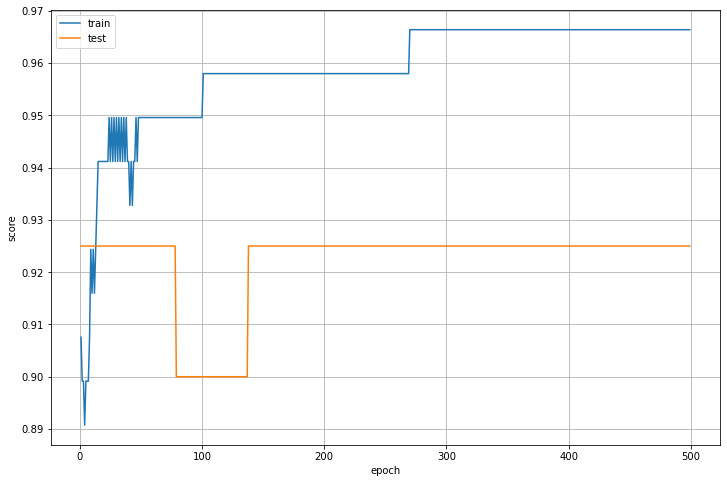

In [426]:
num = range(1,500)
plt.figure(figsize=(12,8))
plt.plot(num,train_list, label= 'train')
plt.plot(num,test_list, label = 'test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('score')
plt.grid()
plt.show()

In [427]:
# early_stopping : 조기종료 여부 (기:False)
# n_iter_no_change : n번 동안 변경 되지 않은 경우 early_stopping이 True
# tol : 성능 개선의 기준값
sc = SGDClassifier(loss = 'log', tol = 0.00001,
                    random_state = 42,
                    n_iter_no_change = 2,
                    early_stopping = True)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.6218487394957983
0.65
5


## 실습: SVM(Support Vector Machine)
- ML에서 오랫동안 연구되었고 성능이 좋은 모델
- DL보다 성능이 좋은 경우도 있음
---

##### SVC분류

In [428]:
# 모듈 설치
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


##### [1] 데이터 준비

In [429]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [430]:
# data , target  나누기
data = digits['data']
target = digits['target']

In [431]:
# target 확인
target = digits.target
target[0:20] # 0 ~9 반복

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [432]:
# target 종류 확인
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

##### [2] 모델 생성

In [433]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 배열 생성
X = np.array(data)
y = np.array(target)

# train,test 나누기
train_input, test_input, train_target, test_target = train_test_split(
    X,y,random_state=42)

# 모델 생성
model_svc = SVC()
model_svc.fit(train_input,train_target)  

# 모델 스코어
print('train score:',model_svc.score(train_input, train_target))
print('test score :',model_svc.score(test_input, test_target))

train score: 0.9962880475129918
test score : 0.9866666666666667


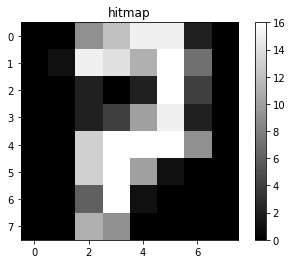

118번 테스트
예측값: [9]
정답  : 8


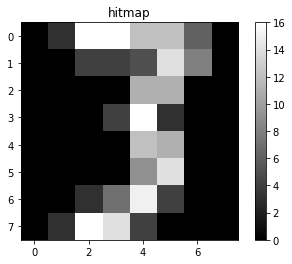

133번 테스트
예측값: [9]
정답  : 7


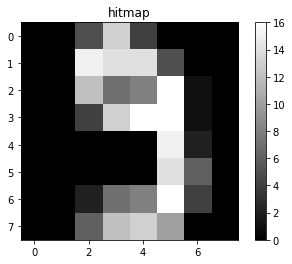

159번 테스트
예측값: [7]
정답  : 9


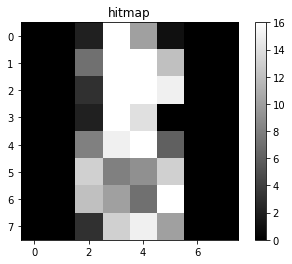

249번 테스트
예측값: [5]
정답  : 9


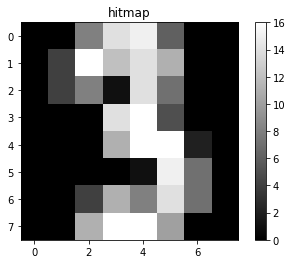

339번 테스트
예측값: [6]
정답  : 5


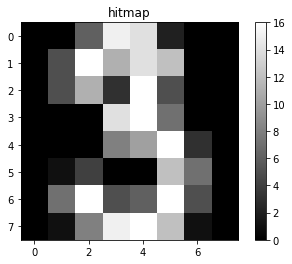

431번 테스트
예측값: [8]
정답  : 3
-------------------
오답목록:[118, 133, 159, 249, 339, 431]
정답목록:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 20

In [434]:
# 모델 predict
list_O =[]
list_X =[]

for i in range(0,450):
    if model_svc.predict([test_input[i]]) != test_target[i]:
        plt.imshow(data[i].reshape(8,8))
        plt.colorbar()
        plt.title('hitmap')
        plt.show()
        print(f'{i}번 테스트')
        print(f'예측값: {model_svc.predict([test_input[i]])}')
        print(f'정답  : {test_target[i]}')

        list_X.append(i)
    else: 
        list_O.append(i)
print('-------------------')
print(f'오답목록:{list_X}')
print(f'정답목록:{list_O}')

In [435]:
#모델의 적용
svm_model = SVC(kernel='linear')
svm_model.fit(train_input, train_target) 

#예측해보기
y_pred = svm_model.predict(test_input)

# 분석결과 확인
svm_report = classification_report(test_target, y_pred)
print(svm_report)

# 오차행렬인 컴퓨전 메트릭스 확인
svm_matrix = confusion_matrix(test_target, y_pred)
print(svm_matrix)

#정확도 비교해보기
svm_accuracy = accuracy_score(test_target, y_pred)
print('SVM의 정확도 : ',svm_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  1  0  0  0  1]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

## Logistic Regression
---

In [436]:
from sklearn.linear_model import LogisticRegression

In [437]:
model_LR = LogisticRegression()
model_LR.fit(train_input,train_target)

# 모델 스코어
print('train score:',model_LR.score(train_input, train_target))
print('test score :',model_LR.score(test_input, test_target))

train score: 1.0
test score : 0.9733333333333334


train score: 1.0
test score : 0.9733333333333334


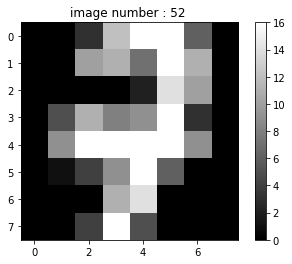

52번 테스트
예측값: [3]
정답  : 9


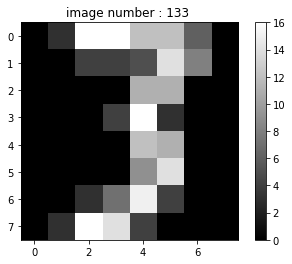

133번 테스트
예측값: [9]
정답  : 7


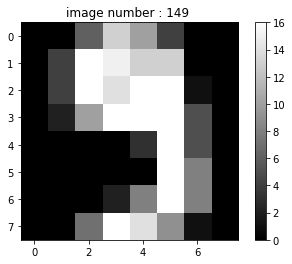

149번 테스트
예측값: [5]
정답  : 3


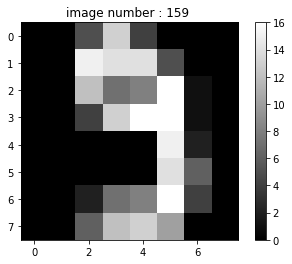

159번 테스트
예측값: [8]
정답  : 9


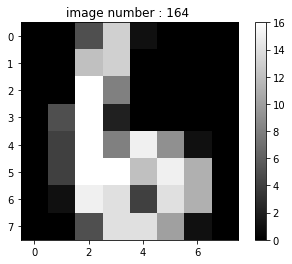

164번 테스트
예측값: [6]
정답  : 4


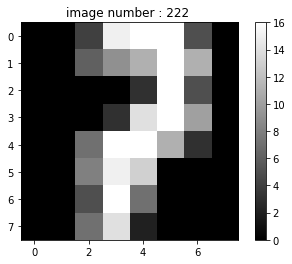

222번 테스트
예측값: [1]
정답  : 4


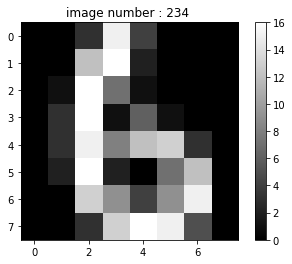

234번 테스트
예측값: [9]
정답  : 5


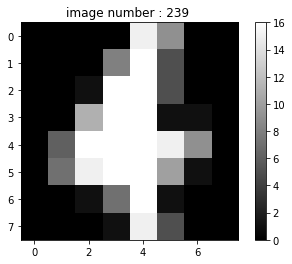

239번 테스트
예측값: [5]
정답  : 8


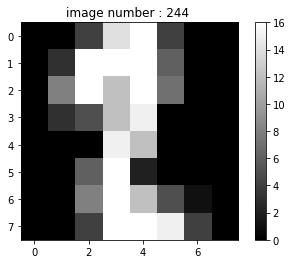

244번 테스트
예측값: [5]
정답  : 6


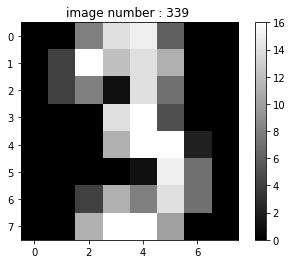

339번 테스트
예측값: [6]
정답  : 5


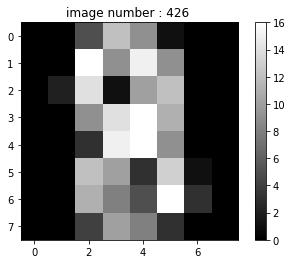

426번 테스트
예측값: [2]
정답  : 1


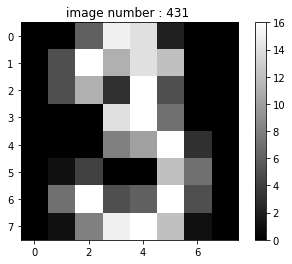

431번 테스트
예측값: [8]
정답  : 3
-------------------
오답목록:[52, 133, 149, 159, 164, 222, 234, 239, 244, 339, 426, 431]
정답목록:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 20

In [438]:
# 모델 predict
list_O =[]
list_X =[]

# 모델 스코어
print('train score:',model_LR.score(train_input, train_target))
print('test score :',model_LR.score(test_input, test_target))

for i in range(0,450):
    if model.predict([test_input[i]]) != test_target[i]:
        plt.imshow(data[i].reshape(8,8))
        plt.colorbar()
        plt.title(f'image number : {i} ')
        plt.show()
        print(f'{i}번 테스트')
        print(f'예측값: {model_LR.predict([test_input[i]])}')
        print(f'정답  : {test_target[i]}')

        list_X.append(i)
    else: 
        list_O.append(i)

print('-------------------')
print(f'오답목록:{list_X}')
print(f'정답목록:{list_O}')

## 스케일 적용 
---

In [440]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
test_input_scaled = scaler.fit_transform(test_input)

# 모델 생성
model_svc_scaled=SVC()
model_LR_scaled=LogisticRegression()

# 모델 훈련
model_svc_scaled.fit(train_input_scaled,train_target)
model_LR_scaled.fit(train_input_scaled,train_target)

# 스케일 적용 전 스코어 확인
print('[스케일 적용 전 csv]')
print('train score:',model_svc.score(train_input, train_target))
print('test score :',model_svc.score(test_input, test_target))
print('----------------------')
print('[스케일 적용 전 LR]')
print('train score:',model_LR.score(train_input, train_target))
print('test score :',model_LR.score(test_input, test_target))

print('=================================')

# 스케일 적용 후 스코어 확인
print('[스케일 적용 후 scv]')
print(f'train score: {model_svc_scaled.score(train_input_scaled,train_target)}')
print(f'test  score: {model_svc_scaled.score(test_input_scaled,test_target)}')
print('----------------------')
print('[스케일 적용 후 LR]')
print(f'train score: {model_LR_scaled.score(train_input_scaled,train_target)}')
print(f'test  score: {model_LR_scaled.score(test_input_scaled,test_target)}')



[스케일 적용 전 csv]
train score: 0.9962880475129918
test score : 0.9866666666666667
----------------------
[스케일 적용 전 LR]
train score: 1.0
test score : 0.9733333333333334
[스케일 적용 후 scv]
train score: 0.9970304380103935
test  score: 0.98
----------------------
[스케일 적용 후 LR]
train score: 0.9985152190051967
test  score: 0.9622222222222222
